In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/LENOVO/Desktop/Dataset/Train.csv')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
print('Number of rows in the dataset are: {}\nNumber of columns in the dataset are: {}'.format(df.shape[0],df.shape[1]))

Number of rows in the dataset are: 8523
Number of columns in the dataset are: 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df=df.drop(['Item_Identifier','Outlet_Identifier'],axis='columns')

In [6]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998         NaN               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

<AxesSubplot:>

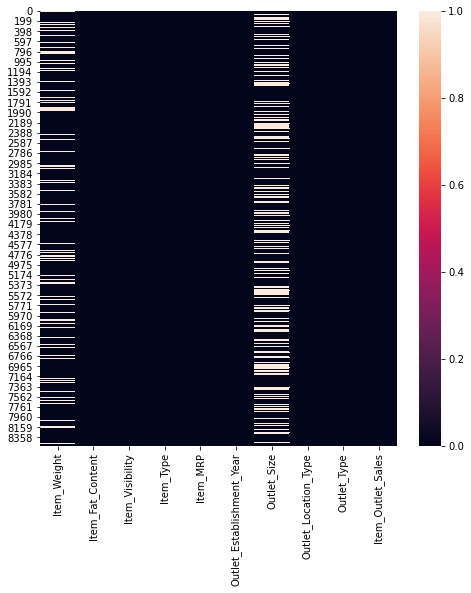

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

It is clearly seen from the heatmap that We have missing value in Item_Weight and Outlet_Size.

In [8]:
### We calculate the Outlet_Age from the Outlet_Establishment_Year beacause the Outlet_Age will be more effective than working with Outlet_Establishment_Year
df['Outlet_Age']=df['Outlet_Establishment_Year'].apply(lambda x:2021-x)
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998         NaN               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0  Supermarket Type1          3735.1380          22  
1  Supermarket Type2           443.4228          12  
2  Supermarket Type1          2097.2700          22  
3      Grocery Store           732.3800          23  
4  Supermarket Type1           994.7052          34

In [9]:
df=df.drop('Outlet_Establishment_Year',axis='columns')

In [10]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  \
0  249.8092      Medium               Tier 1  Supermarket Type1   
1   48.2692      Medium               Tier 3  Supermarket Type2   
2  141.6180      Medium               Tier 1  Supermarket Type1   
3  182.0950         NaN               Tier 3      Grocery Store   
4   53.8614        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  Outlet_Age  
0          3735.1380          22  
1           443.4228          12  
2          2097.2700          22  
3           732.3800          23  
4           994.7052          34

In [11]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

From the heatmap it is clearly seen that there is no multicolinearity among explanatory variables.

In [12]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales  \
count  7060.000000      8523.000000  8523.000000        8523.000000   
mean     12.857645         0.066132   140.992782        2181.288914   
std       4.643456         0.051598    62.275067        1706.499616   
min       4.555000         0.000000    31.290000          33.290000   
25%       8.773750         0.026989    93.826500         834.247400   
50%      12.600000         0.053931   143.012800        1794.331000   
75%      16.850000         0.094585   185.643700        3101.296400   
max      21.350000         0.328391   266.888400       13086.964800   

        Outlet_Age  
count  8523.000000  
mean     23.168133  
std       8.371760  
min      12.000000  
25%      17.000000  
50%      22.000000  
75%      34.000000  
max      36.000000

# Exploratory Data Analysis

## Univariate Analysis

### For Numerical Variables

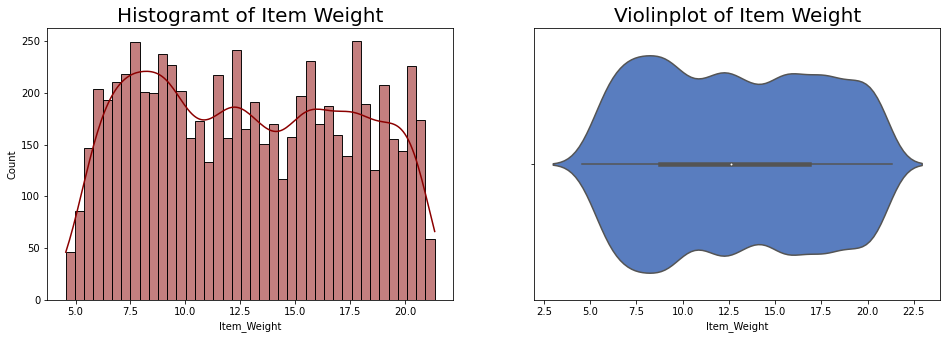

In [13]:
plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(df['Item_Weight'].dropna(),kde=True,color='darkred',bins=40)
plt.title('Histogramt of Item Weight',size=20)

plt.subplot(122)
sns.violinplot(data = df, x = 'Item_Weight',palette='muted')
plt.title('Violinplot of Item Weight', size = 20)

plt.show()

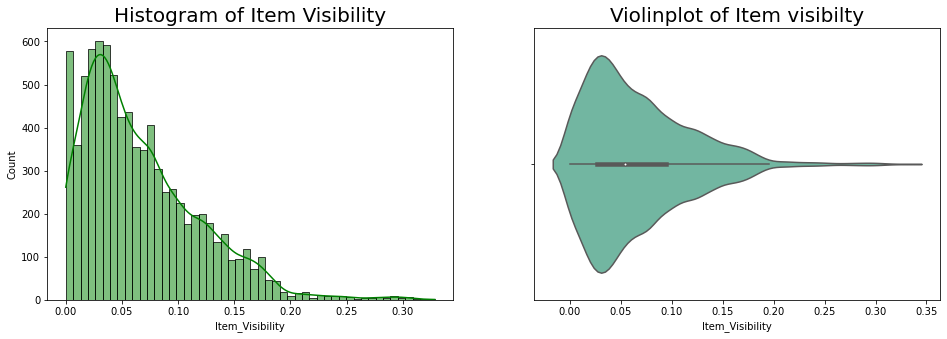

In [14]:
plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Item_Visibility', kde = True,color='green')
plt.title('Histogram of Item Visibility', size = 20)

plt.subplot(122)
sns.violinplot(data = df, x = 'Item_Visibility',palette='Set2')
plt.title('Violinplot of Item visibilty', size = 20)

plt.show()

From Histogram and Violinplot it is clearly seen that several outliers are present in Item Visibility

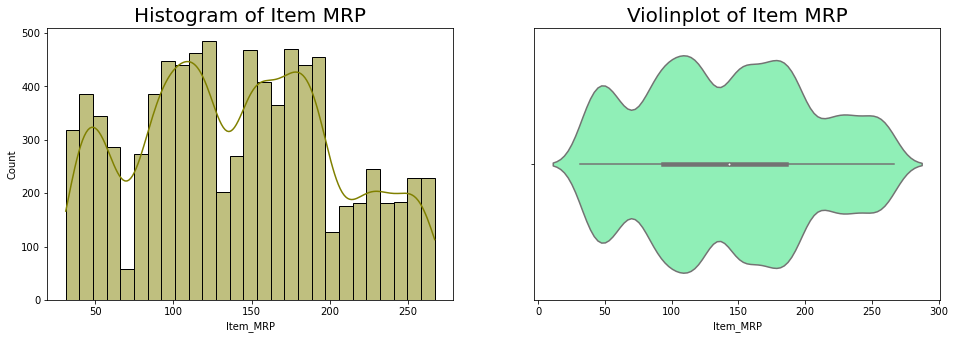

In [15]:
plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Item_MRP', kde = True,color='olive')
plt.title('Histogram of Item MRP', size = 20)

plt.subplot(122)
sns.violinplot(data = df, x = 'Item_MRP',palette='rainbow',)
plt.title('Violinplot of Item MRP', size = 20)
plt.show()

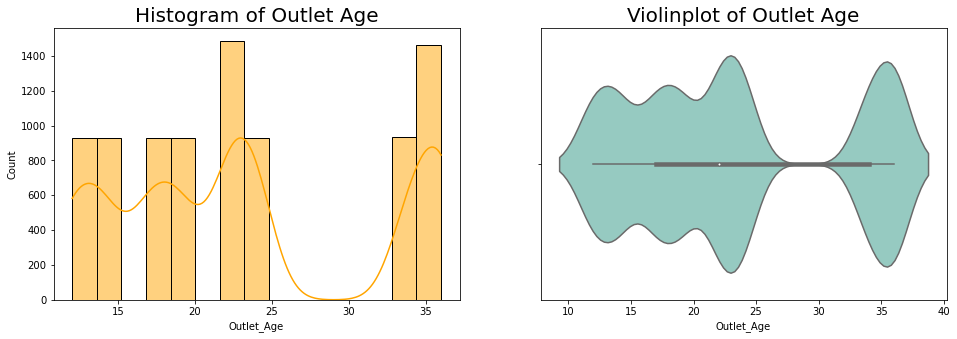

In [16]:
plt.figure(figsize = (16,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Outlet_Age', kde = True,color='orange')
plt.title('Histogram of Outlet Age', size = 20)

plt.subplot(122)
sns.violinplot(data = df, x = 'Outlet_Age',palette='Set3')
plt.title('Violinplot of Outlet Age', size = 20)



plt.show()

### For Categorical Variables

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here We have clearly seen that there is different columns for Low Fat and Regular, so we have to replace those columns with Low Fat and Regular

In [18]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(x='Item_Fat_Content',data=df)
plt.title('Countplot of Item Fat Content',size=20)

Text(0.5, 1.0, 'Countplot of Item Fat Content')

Count of Low Fat content product is more than Regular Fat Content product

Text(0.5, 1.0, 'Countplot of Item Type')

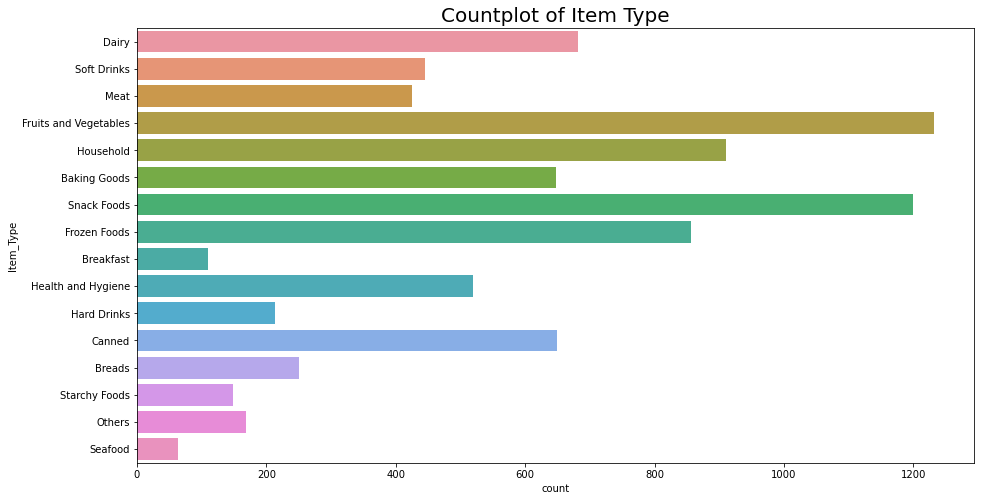

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(y='Item_Type',data=df)
plt.title('Countplot of Item Type',size=20)

Text(0.5, 1.0, 'Countplot of Outlet Size')

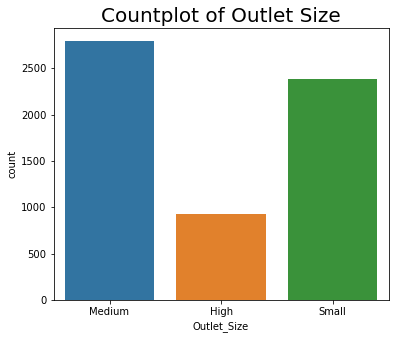

In [21]:
plt.figure(figsize=(6,5))
sns.countplot(x='Outlet_Size',data=df)
plt.title('Countplot of Outlet Size',size=20)

Medium sized outlet is more than High and Small outlet size

Text(0.5, 1.0, 'Countplot of Outlet Location Type')

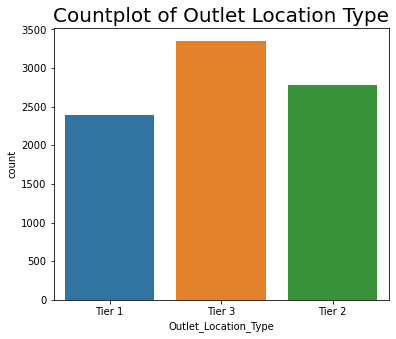

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.title('Countplot of Outlet Location Type',size=20)

Number of outlets are more in Tier 3 cities

Text(0.5, 1.0, 'Countplot of Outlet Type')

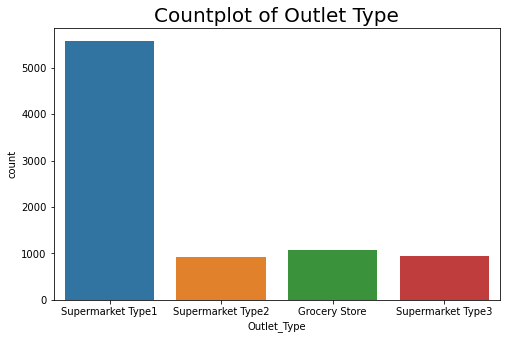

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=df)
plt.title('Countplot of Outlet Type',size=20)

Most of the Outlet Types are Supermarket Type1

## Bivariate Analysis

Text(0.5, 1.0, 'Countplot of Item Type')

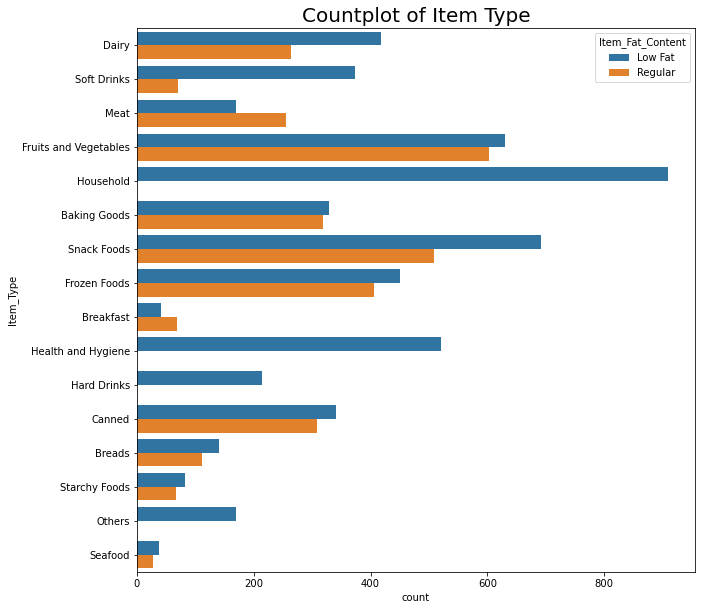

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(y='Item_Type',hue='Item_Fat_Content',data=df)
plt.title('Countplot of Item Type',size=20)

Text(0.5, 1.0, 'Item Type Vs Item MRP')

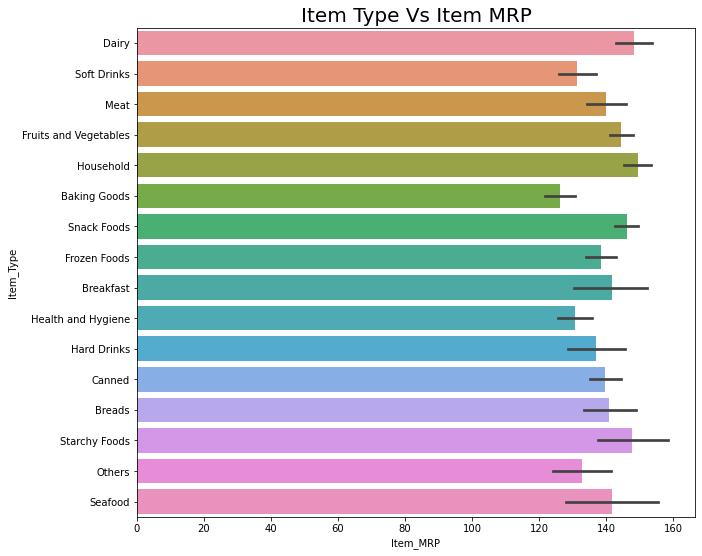

In [25]:
plt.figure(figsize=(10,9))
sns.barplot(y='Item_Type',x='Item_MRP',data=df)
plt.title('Item Type Vs Item MRP',size=20)

Text(0.5, 1.0, 'Countplot of Outlet Type')

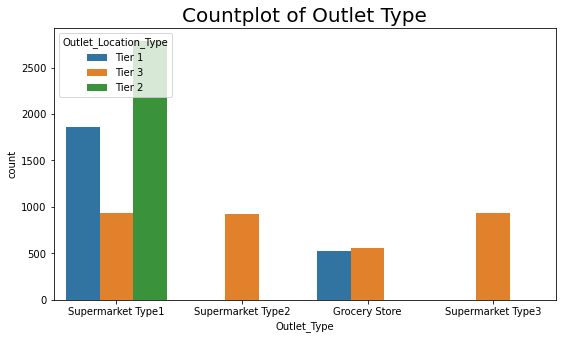

In [26]:
plt.figure(figsize=(9,5))
sns.countplot(x='Outlet_Type',hue='Outlet_Location_Type',data=df)
plt.title('Countplot of Outlet Type',size=20)

Text(0.5, 1.0, 'Barplot of Outlet Age Vs Outlet Type')

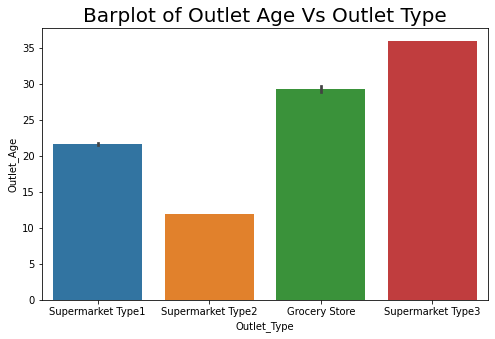

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Outlet_Age',data=df)
plt.title('Barplot of Outlet Age Vs Outlet Type',size=20)

Text(0.5, 1.0, 'Scatterplot of Item weight Vs Item Visibility')

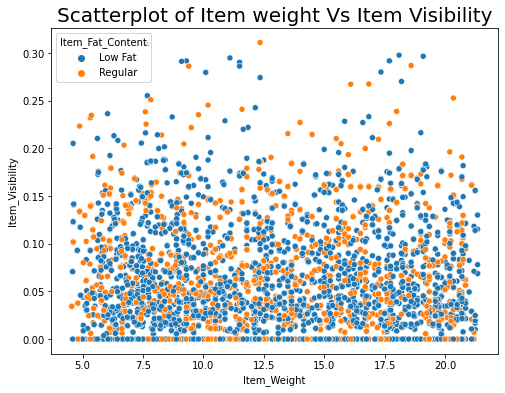

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Item_Weight',y='Item_Visibility',data=df,hue='Item_Fat_Content')
plt.title('Scatterplot of Item weight Vs Item Visibility',size=20)

Text(0.5, 1.0, 'Boxplot of Item Weight Vs Item Type')

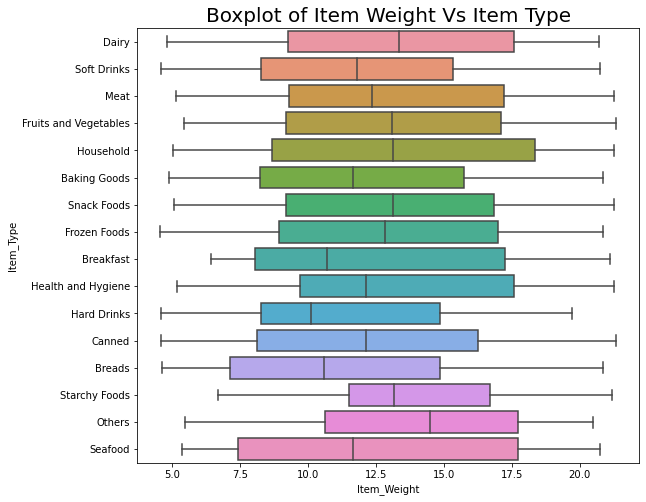

In [29]:
plt.figure(figsize=(9,8))
sns.boxplot(x='Item_Weight',y='Item_Type',data=df)
plt.title('Boxplot of Item Weight Vs Item Type',size=20)

In [30]:
sns.pairplot(df)


# Feature Engineering

## One Hot Encoding

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In this dataset Categorical variables are: Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type.
So we need to perform One Hot Encoding for this variables.

In [32]:
df=pd.get_dummies(data=df,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)

In [33]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Age  \
0         9.30         0.016047  249.8092          3735.1380          22   
1         5.92         0.019278   48.2692           443.4228          12   
2        17.50         0.016760  141.6180          2097.2700          22   
3        19.20         0.000000  182.0950           732.3800          23   
4         8.93         0.000000   53.8614           994.7052          34   

   Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                         0                 0                    0   
1                         1                 0                    0   
2                         0                 0                    0   
3                         1                 0                    0   
4                         0                 0                    0   

   Item_Type_Canned  Item_Type_Dairy  ...  Item_Type_Snack Foods  \
0                 0                1  ...                      0   
1                 0                0  ...                      0   
2                 0                0  ...                      0   
3                 0                0  ...                      0   
4                 0                0  ...                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_Medium  \
0                      0                        0                   1   
1                      1                        0                   1   
2                      0                        0                   1   
3                      0                        0                   0   
4                      0                        0                   0   

   Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
0                  0                            0   
1                  0                            0   
2                  0                            0   
3                  0                            0   
4                  0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            1                              0   
2                            0                              1   
3                            1                              0   
4                            1                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 28 columns]

## Handling Missing Values

Here for missing value imputation We are using KNN Imputer

In [34]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10)
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [35]:
df.isna().any()

Item_Weight                        False
Item_Visibility                    False
Item_MRP                           False
Item_Outlet_Sales                  False
Outlet_Age                         False
Item_Fat_Content_Regular           False
Item_Type_Breads                   False
Item_Type_Breakfast                False
Item_Type_Canned                   False
Item_Type_Dairy                    False
Item_Type_Frozen Foods             False
Item_Type_Fruits and Vegetables    False
Item_Type_Hard Drinks              False
Item_Type_Health and Hygiene       False
Item_Type_Household                False
Item_Type_Meat                     False
Item_Type_Others                   False
Item_Type_Seafood                  False
Item_Type_Snack Foods              False
Item_Type_Soft Drinks              False
Item_Type_Starchy Foods            False
Outlet_Size_Medium                 False
Outlet_Size_Small                  False
Outlet_Location_Type_Tier 2        False
Outlet_Location_

## Outlier Detection

From EDA (Histogram, Violinplot) we have found that several Outliers are present in Item Visibility, so We will remove the outliers using IQR method

In [36]:
sorted(df['Item_Visibility'])
quartile1,quartile3=np.percentile(df.Item_Visibility,[25,75])
print("Value of two quartiles are: ",quartile1,",",quartile3)

Value of two quartiles are:  0.0269894775 , 0.0945852925


In [37]:
IQR_val=quartile3-quartile1
print("Interquartile range is: ",IQR_val)

Interquartile range is:  0.067595815


In [38]:
lower_bound=quartile1-(1.5*IQR_val)
upper_bound=quartile3+(1.5*IQR_val)
print("Lower bound and Upper bound are: ",lower_bound,",",upper_bound)

Lower bound and Upper bound are:  -0.07440424500000001 , 0.195979015


In [39]:
new_df=df[(df['Item_Visibility']>lower_bound)&(df['Item_Visibility']<upper_bound)]

In [40]:
new_df.shape

(8379, 28)

After removal of outliers the the number of rows and columns in our dataset are 8379 and 28

# Checking Gaussian Distribution

We will check whether the variables are follwing the Gaussian Distribution or not.

In [41]:
import scipy.stats as stats

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(new_df['Item_Visibility'],plot=plt)
plt.subplot(122)
sns.histplot(new_df['Item_Visibility'],kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(new_df['Item_Outlet_Sales'],plot=plt)
plt.subplot(122)
sns.histplot(new_df['Item_Outlet_Sales'],kde=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

We have clearly seen that two variables Item Visibility and Item Outlet Sales doesn't follow Gaussian Distribution, so We would convert this two variables into Gaussian Distribution.

In [65]:
Item_outlet_sales_tr=np.sqrt(new_df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

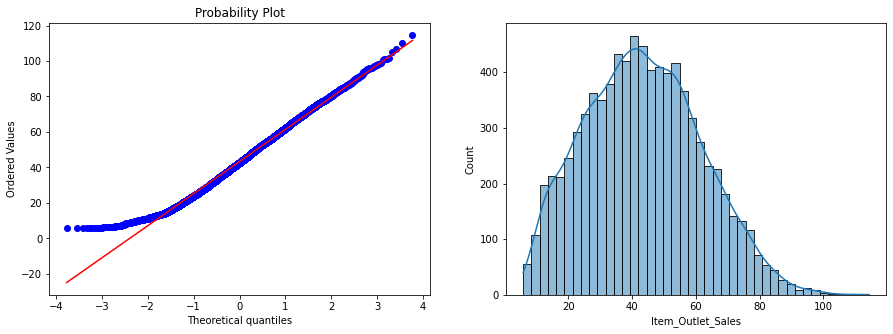

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(Item_outlet_sales_tr,plot=plt)
plt.subplot(122)
sns.histplot(Item_outlet_sales_tr,kde=True)

In [139]:
Item_Visibility_tr=new_df['Item_Visibility']**(0.5)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

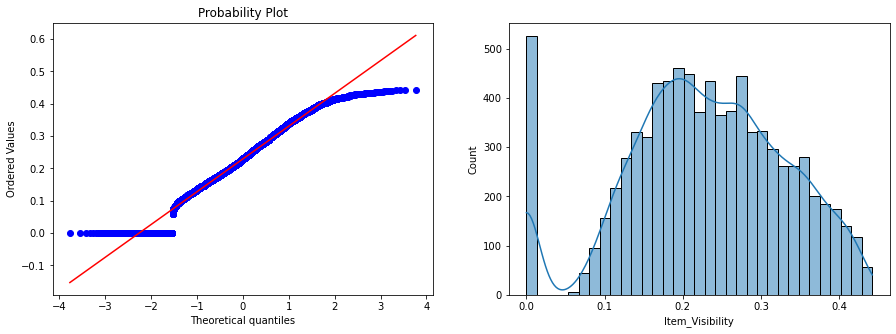

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(121)
stats.probplot(Item_Visibility_tr,plot=plt)
plt.subplot(122)
sns.histplot(Item_Visibility_tr,kde=True)

In [134]:

new_df.to_csv('preprocessed.csv', index = False)